## **Instructions for running code**

### Download the .ipynb file and make sure all the libraries are installed.

### I have used kaggle platform to write and execute my code, Kindly do the same as the libraries will be pre-installed and you won't be needing to install anything separately.


# **Question 1: Load**

Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here

Please describe the structure of the data. Number of records and fields in each record?

Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

In [45]:
import pandas as pd
import json
## the file path below is the one used by my system. kindly change it before executing
with open('../input/transactions/transactions.txt') as f:
    lines = f.readlines()

data = []
for line in lines:
    data.append(json.loads(line))

df = pd.DataFrame(data)

df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False


### Dataset size, number of columns, rows, and first 5 rows

In [46]:
print('The number of rows and columns in this particular dataset are',df.shape)
print("------------------------------------------------------------------------------------------------------------------")
print('The number of rows in this particular dataset are',df.count(axis='rows'))
print("------------------------------------------------------------------------------------------------------------------")
print('The number of columns in this particular dataset are',df.count(axis='columns'))
print("------------------------------------------------------------------------------------------------------------------")
df.head(5)

The number of rows and columns in this particular dataset are (786363, 29)
------------------------------------------------------------------------------------------------------------------
The number of rows in this particular dataset are accountNumber               786363
customerId                  786363
creditLimit                 786363
availableMoney              786363
transactionDateTime         786363
transactionAmount           786363
merchantName                786363
acqCountry                  786363
merchantCountryCode         786363
posEntryMode                786363
posConditionCode            786363
merchantCategoryCode        786363
currentExpDate              786363
accountOpenDate             786363
dateOfLastAddressChange     786363
cardCVV                     786363
enteredCVV                  786363
cardLast4Digits             786363
transactionType             786363
echoBuffer                  786363
currentBalance              786363
merchantCity             

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


### Data type of each field in the dataset

In [47]:
print('The data types of each field in particular dataset are',df.dtypes)


The data types of each field in particular dataset are accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurring

### Checking for null values in the data

In [48]:
print('Checking if there are any null values in the Data',df.isnull())



Checking if there are any null values in the Data         accountNumber  customerId  creditLimit  availableMoney  \
0               False       False        False           False   
1               False       False        False           False   
2               False       False        False           False   
3               False       False        False           False   
4               False       False        False           False   
...               ...         ...          ...             ...   
786358          False       False        False           False   
786359          False       False        False           False   
786360          False       False        False           False   
786361          False       False        False           False   
786362          False       False        False           False   

        transactionDateTime  transactionAmount  merchantName  acqCountry  \
0                     False              False         False       False   
1    

In [49]:
print('Checking if there are any null values in the Data',df.isnull().values.any())


Checking if there are any null values in the Data False


In [50]:
print('Checking if there are any null values in the Data',df.isnull().sum())

Checking if there are any null values in the Data accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64


In [51]:
print('Value count of fields in the output field that is isFraud\n',df.isFraud.value_counts())


Value count of fields in the output field that is isFraud
 False    773946
True      12417
Name: isFraud, dtype: int64


### Minimum and maximum value of important fields in the dataset

In [52]:
#Maximum value of credLimit, availableMoney and transactionAmount
maxValueCredLimit = df['creditLimit'].max(skipna = False)
maxValueAvailableMoney = df['availableMoney'].max(skipna = False)
maxTransactionAmount = df['transactionAmount'].max(skipna = False)

print('Max value of Credit limit is' ,maxValueCredLimit)
print('Max value of Available Money is' ,maxValueAvailableMoney)
print('Max value of Transaction Amount is', maxTransactionAmount)

##Minimum Value of credLimit, availableMoney and transactionAmount
minValueCredLimit = df['creditLimit'].min(skipna = False)
minValueAvailableMoney = df['availableMoney'].min(skipna = False)
minTransactionAmount = df['transactionAmount'].min(skipna = False)

print('min value of Credit limit is' ,minValueCredLimit)
print('min value of Available Money is' ,minValueAvailableMoney)
print('min value of Transaction Amount is', minTransactionAmount)


Max value of Credit limit is 50000.0
Max value of Available Money is 50000.0
Max value of Transaction Amount is 2011.54
min value of Credit limit is 250.0
min value of Available Money is -1005.63
min value of Transaction Amount is 0.0


### Unique count of all the fields in the data

In [53]:
print('Unique Value counts in the data',df.nunique())
#print('Unique Value counts in the data',df.value_counts())


Unique Value counts in the data accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521916
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5246
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatc

### Basic Statistical Summary of the dataset

In [54]:
print('Generating descriptive statistics \n',df.describe())

Generating descriptive statistics 
          creditLimit  availableMoney  transactionAmount  currentBalance
count  786363.000000   786363.000000      786363.000000   786363.000000
mean    10759.464459     6250.725369         136.985791     4508.739089
std     11636.174890     8880.783989         147.725569     6457.442068
min       250.000000    -1005.630000           0.000000        0.000000
25%      5000.000000     1077.420000          33.650000      689.910000
50%      7500.000000     3184.860000          87.900000     2451.760000
75%     15000.000000     7500.000000         191.480000     5291.095000
max     50000.000000    50000.000000        2011.540000    47498.810000


# **Question 2: Plot**

Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

Report any structure you find and any hypotheses you have about that structure.



### Mean, median and mode of transactionAmount field

In [55]:
mean =df['transactionAmount'].mean()
median = df['transactionAmount'].median()
mode = df['transactionAmount'].mode()
print('Mean of transactionAmount field',mean)
print('Median of transactionAmount field',median)
print('Mode of transactionAmount field',mode)

Mean of transactionAmount field 136.98579095150615
Median of transactionAmount field 87.9
Mode of transactionAmount field 0    0.0
dtype: float64


### Plotting a histogram for the transactionAmount column.

<AxesSubplot:>

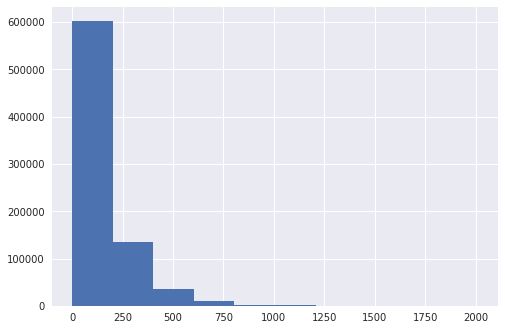

In [56]:
df['transactionAmount'].hist()

# Right Skewed or Postive Skewed
#### So, the distribution which is right skewed have a long tail that extends to the right or positive side of the x axis, same as the below plot.

#### Here you can see the positions of all the three measures on the plot. So, you will find that:

* #### mean greater than the mode
 
* #### median greater than the mode

* #### mean greater than median

#### The first and second always hold in case of right skewed distribution but third one may not be valid sometimes. Below is one real life example You can clearly see that it is a right skewed data with its tail in the +ve side of the distribution. Here the distribution tells that most of the people's transaction amount is near to 0 to 250 dollars and then the number of people with transaction amount greater than that decreases.


# Effects of skewness
#### Real life distributions are usually skewed. If there are too much skewness in the data, then many statistical model don’t work but why?

#### So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. There are statistical model that are robust to outlier like a Tree-based models but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.


# Log transformation
#### A log transformation can help to fit a very skewed distribution into a Gaussian one. After log transformation we can easily see pattern in our data.

# **Question 3: Data Wrangling - Duplicate Transactions**

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

Can you programmatically identify reversed and multi-swipe transactions?

What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)


### **First, Finding the reveresed Transactions**

In [57]:
List_Of_Categories_In_Column=list(df['transactionType'].value_counts().index)
print('The categories in the transactionType columns are',List_Of_Categories_In_Column)

The categories in the transactionType columns are ['PURCHASE', 'REVERSAL', 'ADDRESS_VERIFICATION', '']


In [58]:
df1 = df[['transactionAmount','transactionType']]
print('A dataframe containing amount and type of transaction\n',df1)

A dataframe containing amount and type of transaction
         transactionAmount transactionType
0                   98.55        PURCHASE
1                   74.51        PURCHASE
2                    7.47        PURCHASE
3                    7.47        PURCHASE
4                   71.18        PURCHASE
...                   ...             ...
786358             119.92        PURCHASE
786359              18.89        PURCHASE
786360              49.43        PURCHASE
786361              49.89        PURCHASE
786362              72.18        PURCHASE

[786363 rows x 2 columns]


In [59]:
df_reversed = df1[df1["transactionType"] == "REVERSAL"] 
print('Dataframe consisting of only reversed transactions\n',df_reversed)

Dataframe consisting of only reversed transactions
         transactionAmount transactionType
39                 215.13        REVERSAL
73                   3.87        REVERSAL
101                168.57        REVERSAL
133                450.74        REVERSAL
156                 81.73        REVERSAL
...                   ...             ...
786106              10.05        REVERSAL
786120             201.79        REVERSAL
786219              86.14        REVERSAL
786225              49.39        REVERSAL
786301              22.55        REVERSAL

[20303 rows x 2 columns]


In [60]:
df_reversed.head(5)

,transactionAmount,transactionType
39,215.13,REVERSAL
73,3.87,REVERSAL
101,168.57,REVERSAL
133,450.74,REVERSAL
156,81.73,REVERSAL


In [61]:
#total number of transactions and total dollar amount 
print('The total number of Reversed Transactions are \n', df_reversed.transactionType.count())
print('The total dollar amount of Reversed Transactions are \n' '$',df_reversed.transactionAmount.sum())

The total number of Reversed Transactions are 
 20303
The total dollar amount of Reversed Transactions are 
$ 2821792.5


### The total number of Reversed Transactions are **20303**
### The total dollar amount of Reversed Transactions are **$2821792.5**

### ****Now, Finding the multi-swipe transaction** **

### **ASSUMPTION** : For multi-swipe transaction finding, I have taken the timeframe between two transaction to be under 1 minute. Which means the transaction is considered as multi-swipe if and only if the two transactions took place under 1 minute of time frame and same amount in dollar.

In [62]:
#multi-swipe Transaction
df['transactionDateTime'] =  pd.to_datetime(df['transactionDateTime'])#, format='%d%b%Y:%H:%M:%S.%f')
df.sort_values(['customerId', 'transactionDateTime'], inplace=True)
m1 = df.groupby('customerId', sort=False)['transactionAmount'].apply(lambda x: x.duplicated())
m2 = df.groupby('customerId', sort=False)['transactionDateTime'].diff() <= pd.Timedelta(1, unit='minutes')

df['Duplicated?'] = np.where(m1 & m2, 'Yes', 'No')
df_duplicated = df[df["Duplicated?"] == "Yes"] 


In [63]:
#Sorting the data by DateTime field
df_duplicated = df_duplicated.sort_values(by='transactionDateTime', ascending=True)
df_duplicated

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,Duplicated?
408581,325587097,325587097,20000.0,19721.32,2016-01-01 03:50:28,188.23,Shell Repair,US,US,02,...,278.68,,,,True,,,False,False,Yes
325374,767620004,767620004,15000.0,13535.06,2016-01-01 06:56:25,493.38,West End Beauty #380339,US,US,09,...,1464.94,,,,True,,,False,False,Yes
774571,566470902,566470902,5000.0,4993.74,2016-01-01 08:39:10,6.26,oldnavy.com,US,US,05,...,6.26,,,,False,,,False,False,Yes
9383,745217385,745217385,250.0,240.53,2016-01-01 09:01:30,296.67,Blue Mountain Online Services,US,US,09,...,9.47,,,,False,,,False,False,Yes
472426,444672715,444672715,7500.0,7203.27,2016-01-01 09:24:26,296.73,Dallas Journal,US,US,09,...,296.73,,,,False,,,False,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273002,380680241,380680241,5000.0,2475.26,2016-12-30 15:19:33,56.83,Next Day eCards,US,US,05,...,2524.74,,,,False,,,False,False,Yes
273006,380680241,380680241,5000.0,1423.99,2016-12-30 16:50:06,50.49,Fresh Flowers,US,US,02,...,3576.01,,,,False,,,False,False,Yes
426577,101596991,101596991,5000.0,2107.83,2016-12-30 19:50:06,294.01,Franks Sandwitch Bar,US,US,05,...,2892.17,,,,True,,,False,False,Yes
273029,380680241,380680241,5000.0,1532.73,2016-12-30 21:50:34,145.93,Blue Mountain Online Services,US,US,09,...,3467.27,,,,False,,,False,False,Yes


In [64]:
#total number of transactions and total dollar amount 
print('The total number of Duplicated Transactions are \n', df_duplicated.transactionType.count())
print('The total dollar amount of Duplicated Transactions are \n' '$',df_duplicated.transactionAmount.sum())

The total number of Duplicated Transactions are 
 5567
The total dollar amount of Duplicated Transactions are 
$ 746144.06


### The total number of multi-swipe Transactions are **5567**
### The total dollar amount of multi-swipe Transactions are **$746144.06**

# **Question 4: Model**

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

Provide an estimate of performance using an appropriate sample, and show your work.

Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

Thank you very much for your efforts! We look forward to reviewing your insights!

In [65]:
df['transactionDateTime'] =  pd.to_datetime(df['transactionDateTime'])#, format='%d%b%Y:%H:%M:%S.%f')


# Encoding
### The dataset consists of fields which are int, floats, strings and object datatypes.
### let's do some encoding to convert all these datatypes into one single datatype i.e. integers

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['isFraud']=le.fit_transform(df['isFraud'].astype(int))
df['merchantName']=le.fit_transform(df['merchantName'].astype(str))
df['merchantCountryCode']=le.fit_transform(df['merchantCountryCode'].astype(str))
df['merchantCategoryCode']=le.fit_transform(df['merchantCategoryCode'].astype(str))
df['transactionType']=le.fit_transform(df['transactionType'].astype(str))
df['merchantCity']=le.fit_transform(df['merchantCity'].astype(str))
df['merchantState']=le.fit_transform(df['merchantState'].astype(str))
df['cardPresent']=le.fit_transform(df['cardPresent'].astype(str))
df['posOnPremises']=le.fit_transform(df['posOnPremises'].astype(str))
df['expirationDateKeyInMatch']=le.fit_transform(df['expirationDateKeyInMatch'].astype(str))
df['acqCountry']=le.fit_transform(df['acqCountry'].astype(str))
df['echoBuffer']=le.fit_transform(df['echoBuffer'].astype(str))

df['posConditionCode']=le.fit_transform(df['posConditionCode'].astype(str))


df['currentExpDate'] =  pd.to_datetime(df['currentExpDate'])#, format='%d%b%Y:%H:%M:%S.%f')
df['currentExpDate']=le.fit_transform(df['currentExpDate'].astype(str))

df['accountOpenDate'] =  pd.to_datetime(df['accountOpenDate'])#, format='%d%b%Y:%H:%M:%S.%f')
df['accountOpenDate']=le.fit_transform(df['accountOpenDate'].astype(str))

df['dateOfLastAddressChange'] =  pd.to_datetime(df['dateOfLastAddressChange'])#, format='%d%b%Y:%H:%M:%S.%f')
df['dateOfLastAddressChange']=le.fit_transform(df['dateOfLastAddressChange'].astype(str))



df['isFraud']=le.fit_transform(df['isFraud'].astype(int))
df['merchantName']=le.fit_transform(df['merchantName'].astype(int))
df['merchantCountryCode']=le.fit_transform(df['merchantCountryCode'].astype(int))
df['merchantCategoryCode']=le.fit_transform(df['merchantCategoryCode'].astype(int))
df['transactionType']=le.fit_transform(df['transactionType'].astype(int))
df['merchantCity']=le.fit_transform(df['merchantCity'].astype(int))
df['merchantState']=le.fit_transform(df['merchantState'].astype(int))
df['cardPresent']=le.fit_transform(df['cardPresent'].astype(int))
df['posOnPremises']=le.fit_transform(df['posOnPremises'].astype(int))
df['expirationDateKeyInMatch']=le.fit_transform(df['expirationDateKeyInMatch'].astype(int))
df['acqCountry']=le.fit_transform(df['acqCountry'].astype(int))
df['echoBuffer']=le.fit_transform(df['echoBuffer'].astype(int))
df['posConditionCode']=le.fit_transform(df['posConditionCode'].astype(str))


df['currentExpDate'] =  pd.to_datetime(df['currentExpDate'])#, format='%d%b%Y:%H:%M:%S.%f')
df['currentExpDate']=le.fit_transform(df['currentExpDate'].astype(int))

df['accountOpenDate'] =  pd.to_datetime(df['accountOpenDate'])#, format='%d%b%Y:%H:%M:%S.%f')
df['accountOpenDate']=le.fit_transform(df['accountOpenDate'].astype(int))

df['dateOfLastAddressChange'] =  pd.to_datetime(df['dateOfLastAddressChange'])#, format='%d%b%Y:%H:%M:%S.%f')
df['dateOfLastAddressChange']=le.fit_transform(df['dateOfLastAddressChange'].astype(int))
df['posConditionCode']=le.fit_transform(df['posConditionCode'].astype(int))


df['posEntryMode']=le.fit_transform(df['posEntryMode'].astype(str))
df['recurringAuthInd']=le.fit_transform(df['recurringAuthInd'].astype(str))
df['merchantZip']=le.fit_transform(df['merchantZip'].astype(str))


df['posEntryMode']=le.fit_transform(df['posEntryMode'].astype(int))
df['recurringAuthInd']=le.fit_transform(df['recurringAuthInd'].astype(int))
df['merchantZip']=le.fit_transform(df['merchantZip'].astype(int))


df['accountNumber'] = df['accountNumber'].astype(int)
df['customerId'] = df['customerId'].astype(int)
df['cardCVV'] = pd.to_numeric(df.cardCVV, errors="coerce")
df['enteredCVV'] = pd.to_numeric(df.enteredCVV, errors="coerce")
df['cardLast4Digits'] = pd.to_numeric(df.cardLast4Digits, errors="coerce")
#df['merchantZip'] = pd.to_numeric(df.merchantZip, errors="coerce")

#df['recurringAuthInd'] = pd.to_numeric(df.recurringAuthInd, errors="coerce")

df['transactionDateTime'] = pd.to_numeric(pd.to_datetime(df['transactionDateTime']))


#### Converting all non positive rows of the availableMoney field into 0 for better model prediction 


In [67]:
## Converting all non positive rows of the availableMoney field into 0 for better model prediction 
df['availableMoney'] = df['availableMoney'].apply(lambda x : x if x > 0 else 0)

#Check negative values in a column
(df.availableMoney < 0).any()

False

# Feature Selection

### There are 29 columns/Fields in this data, There will be few fields which will have no relation with the output field that is isFraud. Having such fields in the training will lead to redundancy and may not give better predictions. Hence, it is always better to remove such fields before building the model

## Univariate feature selection
### Univariate feature selection works by selecting the best features based on univariate statistical tests. We compare each feature to the target variable, to see whether there is any statistically significant relationship between them. It is also called analysis of variance (ANOVA). When we analyze the relationship between one feature and the target variable, we ignore the other features. That is why it is called ‘univariate’. Each feature has its test score.

### Finally, all the test scores are compared, and the features with top scores will be selected.


In [68]:
### Univariate feature selection model building

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:28]
y = df.iloc[:,-2]


bestFeatures = SelectKBest(score_func=chi2,k=10)
fit = bestFeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)




In [69]:
#concat two df for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print("Here are the Features and their score")
featureScores

Here are the Features and their score


,Specs,Score
0,accountNumber,1.536248e+09
1,customerId,1.536248e+09
2,creditLimit,9.557243e+04
3,availableMoney,2.346239e+04
4,transactionDateTime,2.235756e+15
5,transactionAmount,7.169473e+05
6,merchantName,1.440223e+05
7,acqCountry,3.143081e+00
8,merchantCountryCode,2.763207e+00
9,posEntryMode,7.166801e+01


### Printing out the top 15 features

In [70]:
print(featureScores.nlargest(15,'Score'))

                      Specs         Score
4       transactionDateTime  2.235756e+15
0             accountNumber  1.536248e+09
1                customerId  1.536248e+09
5         transactionAmount  7.169473e+05
20           currentBalance  4.328901e+05
6              merchantName  1.440223e+05
2               creditLimit  9.557243e+04
3            availableMoney  2.346239e+04
16               enteredCVV  7.405709e+03
15                  cardCVV  7.395052e+03
14  dateOfLastAddressChange  4.364204e+03
13          accountOpenDate  3.716187e+03
11     merchantCategoryCode  1.787766e+03
17          cardLast4Digits  1.164411e+03
24              cardPresent  8.171857e+02


### Printing out the 10 least impacting scores

In [71]:
print(featureScores.nsmallest(10,'Score'))

                       Specs        Score
27  expirationDateKeyInMatch     0.742582
18           transactionType     1.856427
8        merchantCountryCode     2.763207
7                 acqCountry     3.143081
10          posConditionCode     3.342536
12            currentExpDate    34.174236
9               posEntryMode    71.668011
24               cardPresent   817.185692
17           cardLast4Digits  1164.410882
11      merchantCategoryCode  1787.766313


In [72]:
X.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch'],
      dtype='object')

### Dropping the features that have very low score as they won't have any impact in predicting the fraud transactions

In [73]:
X = df.drop(columns=['cardPresent','posEntryMode','currentExpDate','posConditionCode','acqCountry','merchantCountryCode'
                 ,'transactionType','expirationDateKeyInMatch','Duplicated?','isFraud'],axis=1)

In [74]:
print(X.shape)

(786363, 20)


### now we have 20 columns that are important and decide if the transactions are fraud or not

In [75]:
print(X.columns)

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'merchantCategoryCode', 'accountOpenDate', 'dateOfLastAddressChange',
       'cardCVV', 'enteredCVV', 'cardLast4Digits', 'echoBuffer',
       'currentBalance', 'merchantCity', 'merchantState', 'merchantZip',
       'posOnPremises', 'recurringAuthInd'],
      dtype='object')


### The most useful/important features are:
### accountNumber', 'customerId', 'creditLimit', 'availableMoney','transactionDateTime', 'transactionAmount', 'merchantName',
###       'merchantCategoryCode', 'accountOpenDate', 'dateOfLastAddressChange',
   ###    'cardCVV', 'enteredCVV', 'cardLast4Digits', 'echoBuffer',
  ###  'currentBalance', 'merchantCity', 'merchantState', 'merchantZip',
  ###     'posOnPremises', 'recurringAuthInd'

### Another way of finding the relation between features is **Correlation**

* #### Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables.
* #### The value of correlation can take any values from -1 to 1.
* #### Correlation between two random variables or bivariate data does not necessary imply causal relationship.
* #### Correlation between two variables can also be determined using scatter plot between these two variables.

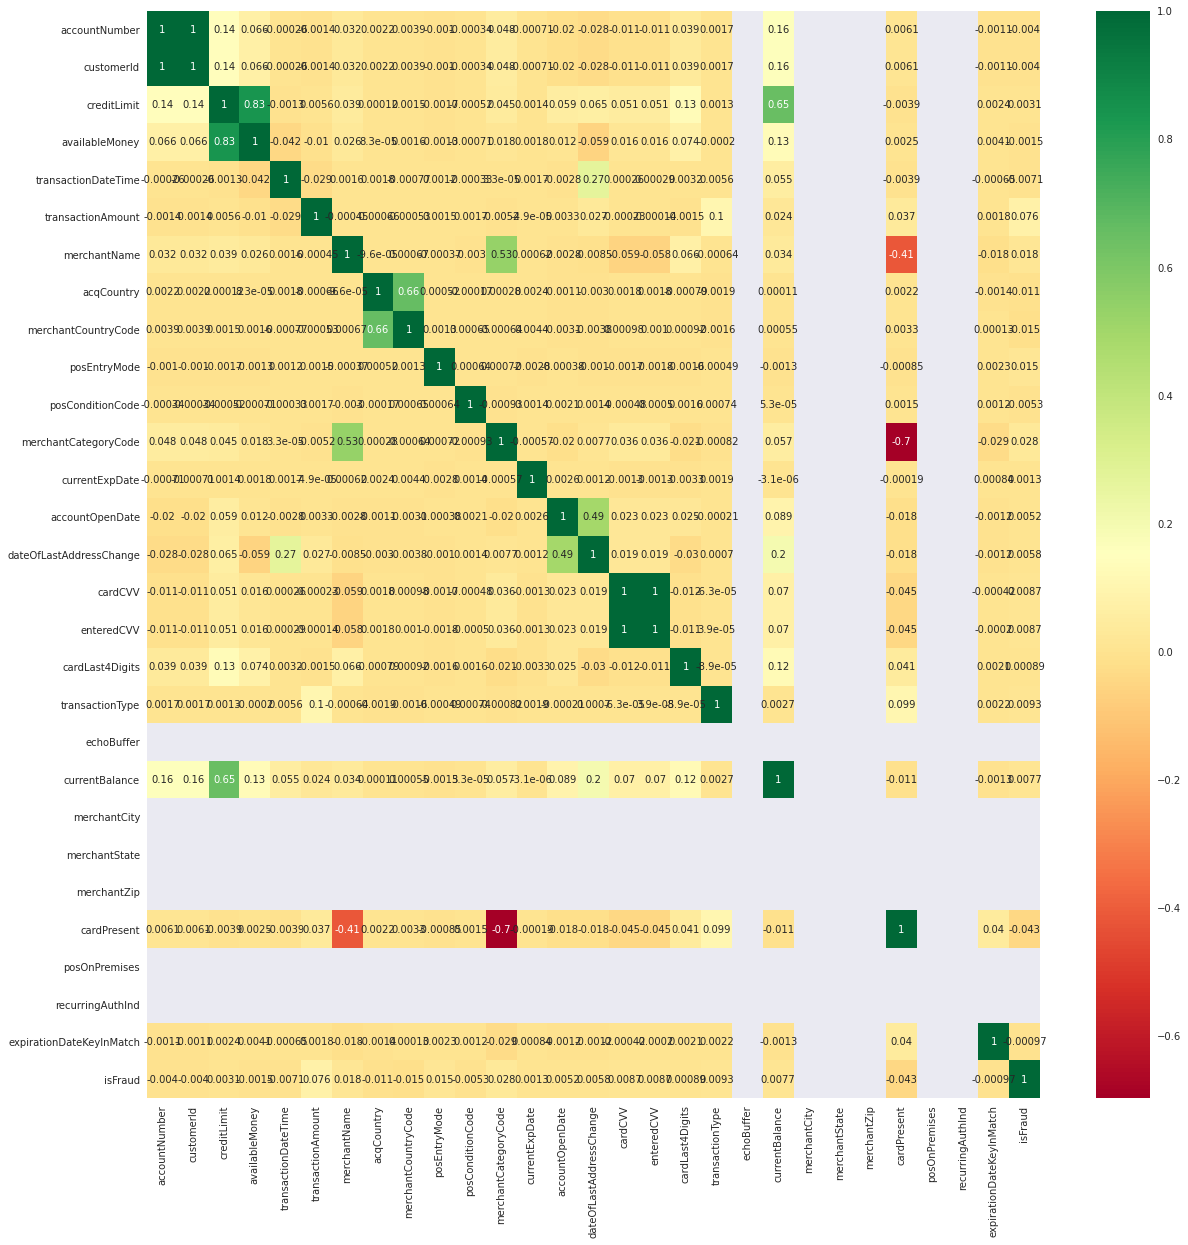

In [76]:
#correlation heatmap
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### A value greater than 0.7 means the fields are highly correlated. In this data, accountNumber and Customerid have a value of 1, which means that we can either use anyone among the two.
### The same is with availableMoney and creditLimit.
### Our output field is isFraud, we can directly remove the fields that are negatively correlated with the output field, this will improve the model performance and also reduce redundancy.

In [77]:
## Value count of each category in the training data output field
y.value_counts(bins=2)

(-0.002, 0.5]    773946
(0.5, 1.0]        12417
Name: isFraud, dtype: int64

# Class Imbalance Problem (Potential Overfitting Scenario)
### As we can se that in the training data, isFraud = false data points are 773946 and isFraud = True there are only 12417 data points. **Hence accuracy will not be a good measure to check the performance of the model because even if our model predicts all the test data as isFraud = False** , the accuracy will be 90% and above.



# k-fold cross-validation

### K-Folds technique is a popular and easy to understand, it generally results in a less biased model compare to other methods. Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is best when there is a class Imbalance problem This method follows the below steps. 
* #### Split the entire data randomly into K folds (value of K shouldn’t be too small or too high, ideally we choose 5 to 10 depending on the data size). The higher value of K leads to less biased model (but large variance might lead to over-fit), where as the lower value of K is similar to the train-test split approach.
* #### Then fit the model using the K-1 (K minus 1) folds and validate the model using the remaining Kth fold. Note down the scores/errors.
* #### Repeat this process until every K-fold serve as the test set. Then take the average of your recorded scores. That will be the performance metric for the model.

In [78]:
### K-Fold Implementation functions
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    return model.score(X_test,y_test)

from sklearn.model_selection import RepeatedStratifiedKFold

def get_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

    return scores


In [79]:
print(X.dtypes)

accountNumber                int64
customerId                   int64
creditLimit                float64
availableMoney             float64
transactionDateTime          int64
transactionAmount          float64
merchantName                 int64
merchantCategoryCode         int64
accountOpenDate              int64
dateOfLastAddressChange      int64
cardCVV                      int64
enteredCVV                   int64
cardLast4Digits              int64
echoBuffer                   int64
currentBalance             float64
merchantCity                 int64
merchantState                int64
merchantZip                  int64
posOnPremises                int64
recurringAuthInd             int64
dtype: object


In [80]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

scores = []
#best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    #best_svr.fit(X_train, y_train)
    #scores.append(best_svr.score(X_test, y_test))
    
  #  print(get_score(LinearRegression(),X_train, X_test, y_train, y_test))
   # print(get_scores(LinearRegression(),X_train, X_test, y_train, y_test))
    #print(get_score(SVC(),X_train, X_test, y_train, y_test))
    #print(get_scores(SVC(),X_train, X_test, y_train, y_test))
    #print(get_score(SVC(),X_train, X_test, y_train, y_test))
    #print(get_score(RandomForestClassifier(),X_train, X_test, y_train, y_test))

Train Index:  [     1      3      4 ... 786358 786359 786361] 

Test Index:  [     0      2      6 ... 786354 786360 786362]
Train Index:  [     0      1      2 ... 786359 786360 786362] 

Test Index:  [     4     10     16 ... 786355 786358 786361]
Train Index:  [     0      2      4 ... 786360 786361 786362] 

Test Index:  [     1      3      5 ... 786356 786357 786359]


# Class Imbalance Problem (Potential Overfitting Scenario)
### As we can se that in the training data, isFraud = false data points are 773946 and isFraud = True there are only 12417 data points. **Hence accuracy will not be a good measure to check the performance of the model because even if our model predicts all the test data as isFraud = False** , the accuracy will be 90% and above.



# AUC-ROC Score 
### The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

### The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

### When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

### When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

### When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

### So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

### Let's use AUC ROC score to check the performance of our models.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC3.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC3.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC2.png)

### Model Building and Splitting the data into train and test splits

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
model1 = LogisticRegression(solver='liblinear')
model2 = KNeighborsClassifier(n_neighbors=4)
model3 = DecisionTreeClassifier(max_depth =3, random_state = 42)
model4 = RandomForestClassifier(max_depth=2, random_state=0)
model5 = GaussianNB()


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)





GaussianNB()

## Prediction on Test Data

In [82]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)


from sklearn.metrics import roc_curve
 #roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)



# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])



print('the AUC ROC score for Logistic Regression Model is -      ',auc_score1)
print("")
print('the AUC ROC score for K Neighbors Classifier Model is -   ',auc_score2)
print("")
print('the AUC ROC score for  Decision Tree Model is -  ',auc_score3)
print("")
print('the AUC ROC score for Random Forest Classifier Model is -   ',auc_score4)
print("")
print('the AUC ROC score for Naive Bayes Classsifier Model is -   ',auc_score5)



the AUC ROC score for Logistic Regression Model is -       0.5186844888781482

the AUC ROC score for K Neighbors Classifier Model is -    0.5073867134186558

the AUC ROC score for  Decision Tree Model is -   0.689575058052834

the AUC ROC score for Random Forest Classifier Model is -    0.6942541154206264

the AUC ROC score for Naive Bayes Classsifier Model is -    0.5186844912546527


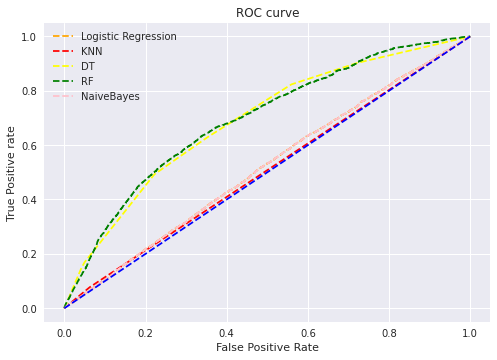

In [83]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='DT')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='RF')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='NaiveBayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


# Best Model
## Clearly Random Forest Classifier gives the best ROC AUC score of **0.69**

## Random Forest

### A random forest consists of multiple random decision trees. Two types of randomnesses are built into the trees. First, each tree is built on a random sample from the original data. Second, at each tree node, a subset of features are randomly selected to generate the best split.

### Random forests are powerful not only in classification/regression but also for purposes such as outlier detection, clustering, and interpreting a data set (e.g., serving as a rule engine with inTrees).

# **HYPER PARAMETER TUNING**

### Now that we know Random Forest Classifier gives the best ROC AUC score, Let us try to tune the hyper parameters and get a better score.

# Parameters of Random Forest

## **max_depth**
### The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

## **n_estimators**
### The number of trees in the forest.

## **max_features**
### The number of features to consider when looking for the best split:

## **min_samples_split**
### The minimum number of samples required to split an internal node:


In [84]:
# Changing the max_depth and n_estimators parameters
model4_rf = RandomForestClassifier(max_depth=20, random_state=0,n_estimators = 1000)
model4_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=0)

In [85]:
##Prediction on Test Data
pred_prob4 = model4_rf.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print('the AUC ROC score for Random Forest Classifier Model after HyperParameter Tuning is    ',auc_score4)


the AUC ROC score for Random Forest Classifier Model after HyperParameter Tuning is     0.8381073976045819


### The AUC ROC score for Random Forest Classifier Model after HyperParameter Tuning is  :   0.8381073976045819

### This means that there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives

#### Plotting ROC Curves for all the models

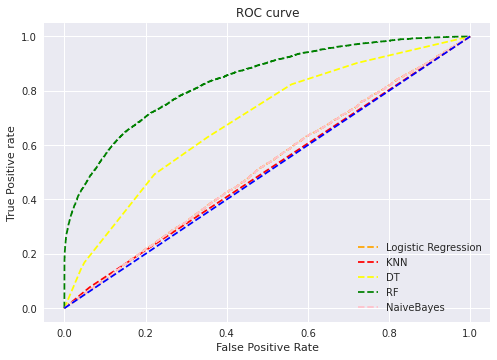

In [86]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='DT')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='RF')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='NaiveBayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


# Result Analysis

* the AUC ROC score for Logistic Regression Model is -       0.5186844888781482

* the AUC ROC score for K Neighbors Classifier Model is -    0.5073867134186558
 
* the AUC ROC score for  Decision Tree Model is -   0.689575058052834
 
* the AUC ROC score for Random Forest Classifier Model before Hyperparameter Tuning is -    0.6942541154206264
 
* the AUC ROC score for Naive Bayes Classsifier Model is -    0.5186844912546527
 
* These scores mean that Logisitcic Regression, KNN and Naive Bayes classifier are not able to distinguish between the isFraud labels.
 
* Where as Decision Tree and Random forest are able to categorise somewhat better compared to the others.

#### After Hyperparameter tuning on Random Forest classifier by changing the number of trees and increasing the depth, The AUC-ROC score obtained is .83 which means that the RF model is able to distinguis between the isFraud label successfully.



## Given more time, 
### * I would evaluate the models based on other Performance metrics such as F1 score, MCC(Matthews Correlation Coefficient) and Cohen's kappa.
### * As the training data is large and it requires a lot of computational power to implement complex ML models, given that I would further tune the models and implement additional complex ML models.
### * As the classes are imbalanced, I will perform sampling operations on the data such as Oversampling and Undersampling.
### * SMOTE and ROSE are two algorithms that can be used for Binary classification of highly imbalanced dataset. I will explore and implement these algorithms.
 SMOTE effectively uses a k-nearest neighbours approach to exclude members of the majority class while in a similar way creating synthetic examples of a minority class. ROSE tries to create estimates of the underlying distributions of the two classes using a smoothed bootstrap approach and sample them for synthetic examples. Both are readily available in R, SMOTE in the package DMwR and ROSE in the package with the same name.
 
reference : SMOTE for high-dimensional class-imbalanced data
             Rok Blagus & Lara Lusa 
             https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-106
             
reference : ROSE: A Package for Binary Imbalanced Learning
            by Nicola Lunardon, Giovanna Menardi, and Nicola TorelliLearning
            https://journal.r-project.org/archive/2014-1/menardi-lunardon-torelli.pdf